Description

In [ ]:
# ZF43 with different promoters with 203bp. 

# Import Functions and set directories

In [1]:
import functions_paper_1
import importlib 
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/fig3_promoterZF/fig3_'

# Make sure directory is set correctly for the fcs exported data in file paths below. Change before the "attune" folder, and the rest should remain the same.

# Import Data

In [2]:
# '20240121flow_exp20240118_p2' rows A-E
# '20240211flow_exp20240208_pYB' rows A-E
# '20240212flow_exp20240209_p3_BioYB' 'Yunbeen' folder, rows D-H


In [3]:
# Import Data -BioRep1
folder = '20240121flow_exp20240118_p2'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder 
data1['mCherry-A'] = data1['mRuby2-A']

In [4]:
# Import Data - BioRep2
folder = '20240211flow_exp20240208_pYB'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder 
data2['mRuby2-A'] = data2['mCherry-A']

In [5]:
# Import Data - BioRep3
folder = '20240212flow_exp20240209_p3_BioYB'
file_path = datadir/'instruments'/'data'/'attune'/'Yunbeen'/folder/'export_singlets_promoters' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Yunbeen'/folder/'well_metadata_srk_promoters.yaml' #Assign yaml paths 
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = folder 
data3['mRuby2-A'] = data3['mCherry-A']

In [11]:
display(data1)

,reporter,ZF43,well,population,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,...,TagBFP-W,Janelia Fluor 549-A,Janelia Fluor 549-H,Janelia Fluor 549-W,mRuby2-A,mRuby2-H,mRuby2-W,Time,bioreplicate,mCherry-A
0,pTET021_203bp 0xCre,no ZF,A1,Single Cells,454612,277595,111,192381,141999,116,...,0,54,83,0,-132,34,0,0.065321,20240121flow_exp20240118_p2,-132
1,pTET021_203bp 0xCre,no ZF,A1,Single Cells,563293,301766,120,289519,156067,127,...,0,57,130,16,15,75,0,0.069340,20240121flow_exp20240118_p2,15
2,pTET021_203bp 0xCre,no ZF,A1,Single Cells,427663,258100,107,359524,261648,116,...,0,403,292,34,71,62,0,0.069340,20240121flow_exp20240118_p2,71
3,pTET021_203bp 0xCre,no ZF,A1,Single Cells,383545,237850,110,349271,232445,112,...,0,411,357,41,-46,19,0,0.076375,20240121flow_exp20240118_p2,-46
4,pTET021_203bp 0xCre,no ZF,A1,Single Cells,401604,267793,106,164921,118391,112,...,0,311,196,27,11,62,0,0.090444,20240121flow_exp20240118_p2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604140,unstained,no ZF,G3,Single Cells,366956,233371,107,288103,196208,108,...,0,242,146,27,-19,42,0,14.988300,20240121flow_exp20240118_p2,-19
604141,unstained,no ZF,G3,Single Cells,306771,206213,94,172086,120450,94,...,0,147,94,0,-16,40,0,14.992200,20240121flow_exp20240118_p2,-16
604142,unstained,no ZF,G3,Single Cells,345249,242325,93,165960,127884,94,...,0,190,120,10,4,40,0,14.992200,20240121flow_exp20240118_p2,4
604143,unstained,no ZF,G3,Single Cells,425778,266268,113,215001,157527,101,...,0,112,146,11,-61,58,0,14.994200,20240121flow_exp20240118_p2,-61


# Concatenate Data, iRFP670 Gate, Add conditions

In [17]:
data = pd.concat( [data1[['reporter','ZF43','bioreplicate','mGL-A','TagBFP-A','mRuby2-A', 'iRFP670-A']],
                data2[['reporter','ZF43','bioreplicate','mGL-A','TagBFP-A','mRuby2-A', 'iRFP670-A']],
                data3[['reporter','ZF43','bioreplicate','mGL-A','TagBFP-A','mRuby2-A', 'iRFP670-A']]
                ], 
                ignore_index=True, 
                 #join='inner'
                 )
display(data)
#data = data[ data['mRuby2-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
#data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]
data['log10 mGL-A'] = np.log10(data['mGL-A'])

#Add new condtion 
data['bioreplicate_reporter'] = data['bioreplicate'] + '_' + data['reporter']

#Add total condition 
data['cond'] = data['reporter'] + '.' + data['ZF43'] + '.' + data['bioreplicate']


iRFP670_gate = 10000 
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]

,reporter,ZF43,bioreplicate,mGL-A,TagBFP-A,mRuby2-A,iRFP670-A
0,pTET021_203bp 0xCre,no ZF,20240121flow_exp20240118_p2,0,58,-132,83
1,pTET021_203bp 0xCre,no ZF,20240121flow_exp20240118_p2,91,-58,15,29
2,pTET021_203bp 0xCre,no ZF,20240121flow_exp20240118_p2,85,-69,71,113
3,pTET021_203bp 0xCre,no ZF,20240121flow_exp20240118_p2,19,-28,-46,10970
4,pTET021_203bp 0xCre,no ZF,20240121flow_exp20240118_p2,43,-76,11,73763
...,...,...,...,...,...,...,...
2289383,pTET021_203bp 0.1xCre,pTET74 UBC.d,20240212flow_exp20240209_p3_BioYB,-24,111,3,767
2289384,pTET021_203bp 0.1xCre,pTET74 UBC.d,20240212flow_exp20240209_p3_BioYB,37,-45,7,1346
2289385,pTET021_203bp 0.1xCre,pTET74 UBC.d,20240212flow_exp20240209_p3_BioYB,41,-59,-58,55
2289386,pTET021_203bp 0.1xCre,pTET74 UBC.d,20240212flow_exp20240209_p3_BioYB,-51,36,-16,25


In [ ]:
display(data)
display( pd.unique(data['bioreplicate'])   )

# Analysis starts here

In [ ]:
ZF43_palette_3 = {  'pTET011 EF1a': 'red', 
       'pTET74 UBC.d': 'orange',
        'pTET73 EFS':  'lime',
       'pTET72 hPGK': 'blue',
      'no ZF': 'gray'}

In [ ]:
display( pd.unique(data_iRFP670gated['cond'])   )

# Joint Histograms all bioreps

In [ ]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

ycat = 'TagBFP-A'; xcat = 'mGL-A'; hue = 'cond'; palette = 'bright'


for rept in repts: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    plottitle = rept + ' hist all'
    g = custom_density_plot(xcat=xcat,ycat=ycat,hue=hue,data=data_now,points = 1e4, hue_order=None,
                        savetitle='',plottitle=plottitle,palette=palette,
                        xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),type=['scatter'],alpha=0)
    g.savefig(figure_folder+ plottitle + '.png',dpi=300,bbox_inches='tight')


Histograms - consolidated bioreps

In [ ]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

ycat = 'TagBFP-A'; xcat = 'mGL-A'; hue = 'ZF43'

hue_order = pd.array( ['no ZF', 'pTET72 hPGK','pTET73 EFS','pTET74 UBC.d','pTET011 EF1a'])
palette = 'winter'

for rept in repts: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    plottitle=rept + ' hist'
    g = custom_density_plot(xcat=xcat,ycat=ycat,hue=hue,data=data_now,points = 1e4, 
                        savetitle='',plottitle=plottitle,palette=palette, hue_order=hue_order,
                        xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),type=['contour'],alpha=0)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# Summary Gmean Plots

### summary stats

In [19]:
df = data_iRFP670gated

by = ['reporter','ZF43','bioreplicate'] #how to filter results, columns
x = ['mGL-A','iRFP670-A', 'TagBFP-A','mRuby2-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s = calc_stats(df,by,x,stat)
s['mGL-A_CV'] = s['mGL-A_std'] / s['mGL-A_mean']
s['TagBFP-A_CV'] = s['TagBFP-A_std'] / s['TagBFP-A_mean']


In [20]:
s.to_excel('FigS8F-H_gmeans.xlsx',index=False)

### Plot summary stats

In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean',  'TagBFP-A_gmean']
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF43'; x_rot = 45
hue = None;  hueorder = None; pairs = None
palette = ZF43_palette_3
order = ZF43_palette_3

yscales = pd.array(['log'])
ylim = [4e1, 4e3]

for rept in repts:
    data_now = s[ s['reporter']==rept]
    for stat in stat_list: 
        y = stat
        for yscale_now in yscales:
                yscale = yscale_now
                plottitle = rept + ' ' + stat
                g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot,
                                ylim =ylim)
                g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean',  'TagBFP-A_gmean']
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF43'; x_rot = 45
hue = 'reporter';  hueorder = repts; 
pairs = [ [('pTET011 EF1a', 'pTET021_203bp 0xCre'), ('pTET011 EF1a', 'pTET021_203bp 0.1xCre')],
         [('pTET74 UBC.d', 'pTET021_203bp 0xCre'), ('pTET74 UBC.d', 'pTET021_203bp 0.1xCre')],
         [( 'pTET73 EFS', 'pTET021_203bp 0xCre'), ( 'pTET73 EFS', 'pTET021_203bp 0.1xCre')],
         [('pTET72 hPGK', 'pTET021_203bp 0xCre'), ('pTET72 hPGK', 'pTET021_203bp 0.1xCre')],
         [('no ZF', 'pTET021_203bp 0xCre'), ('no ZF', 'pTET021_203bp 0.1xCre')],
         [('pTET011 EF1a', 'pTET021_203bp 0xCre'), ('pTET72 hPGK', 'pTET021_203bp 0xCre')],
         [('pTET011 EF1a', 'pTET021_203bp 0.1xCre'), ('pTET72 hPGK', 'pTET021_203bp 0.1xCre')],
         ]
ZF43_palette_3 = {  'pTET011 EF1a': 'red', 
       'pTET74 UBC.d': 'orange',
        'pTET73 EFS':  'lime',
       'pTET72 hPGK': 'blue',
      'no ZF': 'gray'}

palette = { 'pTET021_203bp 0xCre': 'deepskyblue', 
           'pTET021_203bp 0.1xCre': 'blue'}
order = ZF43_palette_3

yscales = pd.array(['log'])
ylim = [2e1, 4e3]


data_now = s[ s['reporter'].isin(repts)]
for stat in stat_list: 
    y = stat
    for yscale_now in yscales:
            yscale = yscale_now
            plottitle = 'Cre plusminus' + ' ' + stat
            g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                            hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot,
                            ylim =ylim, pairs=pairs)
            g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

# Scatter Plots

## Scatter plot all 

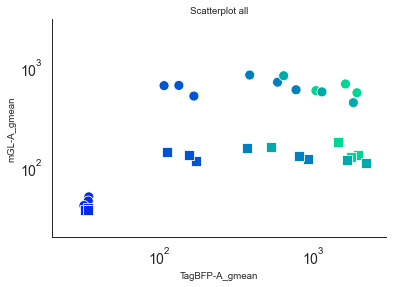

In [21]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
data_now = s[ s['reporter'].isin(repts)]
ZF43_palette_3 = {  'pTET011 EF1a': 'red', 
       'pTET74 UBC.d': 'orange',
        'pTET73 EFS':  'lime',
       'pTET72 hPGK': 'blue',
      'no ZF': 'gray'}
hue_order = pd.array( ['no ZF', 'pTET72 hPGK','pTET73 EFS','pTET74 UBC.d','pTET011 EF1a'])
y = 'mGL-A_gmean'
x = 'TagBFP-A_gmean'
hue = 'ZF43'
palette = 'winter'
style = 'reporter'
ylim = [2e1, 3e3]
xlim = ylim
xsize = 3; ysize=3; 
fontsize = 15
markers = ['o', 's']

plottitle = 'Scatterplot all'
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, markers=markers,
                 plottitle=plottitle, style=style, hue_order = hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xsize=xsize, ysize=ysize, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Normalize Data to EF1a ## 

In [ ]:

#For each bioreplicate, normilize to EF1a

#start dictionary with values that dont matter
map_mGLnorm = { 'test': 'test', 'test2': 'test2'} #for normalizing mGL
map_mChnorm = {'test':'test'}
# map_mGLnorm2 = {'test':'test'}
# map_mChnorm2 = {'test':'test'}
#only get the relevant part of the s dataframe
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
s_subset = s[ s['reporter'].isin(repts)]
# s2_subset = s2[ s2['reporter'].isin(repts)]
#get the list of the bioreplicates 
biorep_repts = pd.unique( s_subset['bioreplicate'])


for rep in biorep_repts: # for each biorep
    
    #All data
    s_now = s_subset[ s_subset['bioreplicate'] == rep] # go to that specific biorep 
    s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
    s_now = s_now[ s_now['ZF43'] == 'pTET73 EFS'] #select that specific ZF value
    #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
    map_mGLnorm[rep] = s_now.iloc[0]['mGL-A_gmean']
    map_mChnorm[rep]= s_now.iloc[0]['TagBFP-A_gmean']

    # # s2_subset -- mGL positive only 
    # s_now = s2_subset[ s2_subset['bioreplicate'] == rep] # go to that specific biorep 
    # s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
    # s_now = s_now[ s_now['ZF37'] == 'pTET EF1a 1x'] #select that specific ZF value
    # #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
    # map_mGLnorm2[rep] = s_now.iloc[0]['mGL-A_gmean']
    # map_mChnorm2[rep]= s_now.iloc[0]['mCherry-A_gmean']

#Map the values to the other column 
#All data
s_subset['ZF43_EF1a_mGL'] = s_subset['bioreplicate'].map(map_mGLnorm).astype(float)
s_subset['mGL-A_gmean norm ZF43_EF1a'] = (s_subset['mGL-A_gmean']) / (s_subset['ZF43_EF1a_mGL'])
s_subset['ZF43_EF1a_TagBFP'] = s_subset['bioreplicate'].map(map_mChnorm).astype(float)
s_subset['mCherry-A_gmean norm ZF43_EF1a'] = (s_subset['TagBFP-A_gmean']) / (s_subset['ZF43_EF1a_TagBFP'])
s_subset['TagBFP-A_gmean norm ZF43_EF1a'] = s_subset['mCherry-A_gmean norm ZF43_EF1a']
# mGL positive only 
# s2_subset['ZF37_EF1a_mGL'] = s2_subset['bioreplicate'].map(map_mGLnorm2).astype(float)
# s2_subset['mGL-A_gmean norm ZF37_EF1a'] = (s2_subset['mGL-A_gmean']) / (s2_subset['ZF37_EF1a_mGL'])
# s2_subset['ZF37_EF1a_mCherry'] = s2_subset['bioreplicate'].map(map_mChnorm2).astype(float)
# s2_subset['mCherry-A_gmean norm ZF37_EF1a'] = (s2_subset['mCherry-A_gmean']) / (s2_subset['ZF37_EF1a_mCherry'])

s_promoters43_normEFS = s_subset
%store s_promoters43_normEFS

display(s_subset.head())

## Scatter PLots normalized to EF1a 

In [ ]:
data_now = s_subset
hue_order = pd.array( ['no ZF', 'pTET72 hPGK','pTET73 EFS','pTET74 UBC.d','pTET011 EF1a'])
data_now = data_now[ data_now['reporter'].isin(repts)]
data_now = data_now[data_now['ZF43'].isin(hue_order)]

y = 'mGL-A_gmean'
x = 'TagBFP-A_gmean'
hue = 'ZF43'
palette = create_custom_colormap(num_colors=len(hue_order))
style = 'reporter'
ylim = [1e1, 2e4]
xlim = ylim

xsize = 3
ysize = 3
fontsize=15
markers = ['o','s']

plottitle = 'Scatterplot all'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, fontsize=15,labelsize=15,
                 plottitle='', style=style, hue_order = hue_order,
                 ylim=ylim, xlim=xlim, s= 100, markers=markers)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

y = 'mGL-A_gmean norm ZF43_EF1a'
x='TagBFP-A_gmean norm ZF43_EF1a'
xlabel = 'TagBFP-A gmean norm.'
ylabel = 'mGL-A gmean norm.'
ylim = [0.2, 1e1]
xlim = [0.02, 1e1]
plottitle = 'Scatterplot all EF1a_norm'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, fontsize=15, labelsize=15,
                 plottitle='', style=style, hue_order = hue_order, xlabel=xlabel, ylabel=ylabel,
                 ylim=ylim, xlim=xlim, s= 100, markers=markers, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Calculate means 
by = ['reporter','ZF43'] #how to filter results, columns
x = ['mGL-A_gmean','TagBFP-A_gmean', 'TagBFP-A_gmean norm ZF43_EF1a', 'mGL-A_gmean norm ZF43_EF1a', 
     'mGL-A_CV','TagBFP-A_CV'] #which parameter to calculate results on
stat = [np.median, np.std, np.mean] #statistics to calculate
s_means = calc_stats(s_subset,by,x,stat)
s_means_ZF43= s_means
%store s_means_ZF43

#Plot scatter of the normalized with the means 
data_now = s_means
y = 'mGL-A_gmean norm ZF43_EF1a_mean'
x='TagBFP-A_gmean norm ZF43_EF1a_mean'
std_y = 'mGL-A_gmean norm ZF43_EF1a_std'
std_x='TagBFP-A_gmean norm ZF43_EF1a_std'
xlabel = 'TagBFP-A gmean norm.'
ylabel = 'mGL-A gmean norm.'
plottitle = 'Scatterplot all EF1a_norm MEANs'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, fontsize=15,
                 plottitle='', style=style, hue_order = hue_order, xlabel=xlabel, ylabel=ylabel,
                 ylim=ylim, xlim=xlim, s= 100, markers=markers, std_x=std_x, std_y=std_y, 
                 legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

#Plot scatter of the CV means
data_now = s_means
x = 'TagBFP-A_CV_mean'
y='mGL-A_CV_mean'
std_x = 'TagBFP-A_CV_std'
std_y='mGL-A_CV_std'
xlabel = 'TagBFP-A CV'
ylabel = 'mGL-A CV'
ylim = [0.1,3.5]
xlim = [0.1,3.5]
plottitle = 'Scatterplot all CV'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, fontsize=15, labelsize=fontsize,
                 plottitle='', style=style, hue_order = hue_order, xlabel=xlabel, ylabel=ylabel,
                 ylim=ylim, xlim=xlim, s= 100, markers=markers, std_x=std_x, std_y=std_y, 
                 yscale='linear',xscale='linear', legend=False)
ax = g
lims = [
    np.min([g.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, ls='--', color='gray')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

# 1D Histograms

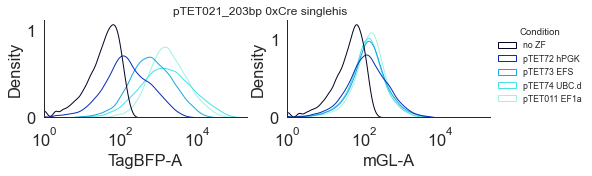

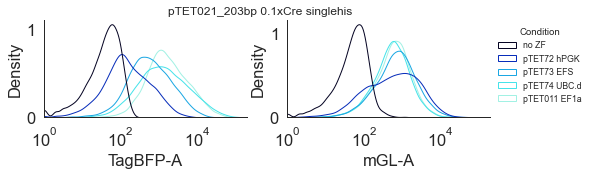

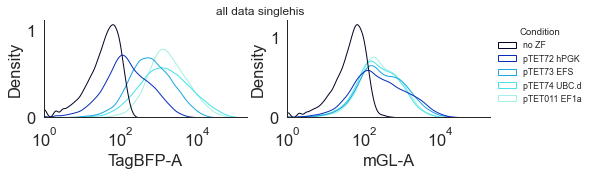

In [22]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
parameters = pd.array([ 'TagBFP-A','mGL-A']); 

hueorder = pd.array( ['no ZF', 'pTET72 hPGK','pTET73 EFS','pTET74 UBC.d','pTET011 EF1a'])

palette = create_custom_colormap(num_colors=len(hue_order))
xlim = [1e0,2e5]
xsize = 8
ysize = 1.8
fontsize = 16.5
hue = 'ZF43'

#No gating on mGL 
for rept in repts: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    data_now = data_now[data_now['ZF43'].isin(hue_order)]
    plottitle = rept + ' singlehis'
    #g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,
                         legendtitle='Condition', xlim=xlim, 
                         #line=mGL_gate, 
                         fontsize=fontsize)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#All data together, no gating on mGL 
data_now = data_iRFP670gated[ data_iRFP670gated['reporter'].isin(repts)]
plottitle = 'all data singlehis'
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
